<div class="alert alert-block alert-success">
    <b><center>CNN Basic Examples</center></b>
    <b><center>RSNET</center></b>
</div>

# Configure Learning Environment

In [1]:
# !pip install git+https://github.com/nockchun/rspy --force
# !pip install mybatis_mapper2sql
import rspy as rsp
rsp.setSystemWarning(off=True)

In [2]:
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers, models, losses, optimizers, datasets, preprocessing, utils

In [3]:
from ipywidgets import interact
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
np.set_printoptions(linewidth=200, precision=2)
tf.__version__

'2.2.0'

# CIFAR10 Dataset
The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [5]:
# Download the mnist dataset using keras
(train_data, train_label), (test_data, test_label) = datasets.cifar10.load_data()
train_data.shape, train_label.shape, test_data.shape, test_label.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [6]:
# Counting unique value of train data
unique, counts = np.unique(train_label, return_counts=True)
num_labels = len(unique)
f"Train labels: {dict(zip(unique, counts))}"

'Train labels: {0: 5000, 1: 5000, 2: 5000, 3: 5000, 4: 5000, 5: 5000, 6: 5000, 7: 5000, 8: 5000, 9: 5000}'

# Preprocessing

In [7]:
# Normalizing
train_data_proc = train_data / 255
test_data_proc = test_data / 255

#One hot encoding
train_label_proc = utils.to_categorical(train_label, 10)
test_label_proc = utils.to_categorical(test_label, 10)

# Base-Line Model

In [8]:
input_base = layers.Input((32, 32, 3))

In [9]:
layer_base = layers.Conv2D(32, 4, activation="relu")(input_base)
layer_base = layers.MaxPool2D(2)(layer_base)
layer_base = layers.Conv2D(64, 3, activation="relu")(layer_base)
layer_base = layers.MaxPool2D(2)(layer_base)

In [10]:
layer_base  = layers.Flatten()(layer_base)
layer_base  = layers.Dense(256, activation="relu")(layer_base)
output_base = layers.Dense(10, activation="softmax")(layer_base)

In [11]:
model_base = models.Model(input_base, output_base)
model_base.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               590080

In [12]:
model_base.compile(
    loss=losses.CategoricalCrossentropy(),
    optimizer=optimizers.Adam(),
    metrics=["accuracy"],
)

In [13]:
history_base = model_base.fit(
    train_data_proc, train_label_proc,
    validation_data=(test_data_proc, test_label_proc),
    batch_size=256,
    epochs=50
)

Epoch 1/50
196/196 [==============================] - 15s 79ms/step - loss: 1.6151 - accuracy: 0.4225 - val_loss: 1.4065 - val_accuracy: 0.5060
Epoch 2/50
196/196 [==============================] - 1s 5ms/step - loss: 1.2655 - accuracy: 0.5548 - val_loss: 1.2388 - val_accuracy: 0.5607
Epoch 3/50
196/196 [==============================] - 1s 5ms/step - loss: 1.1190 - accuracy: 0.6070 - val_loss: 1.0994 - val_accuracy: 0.6178
Epoch 4/50
196/196 [==============================] - 1s 5ms/step - loss: 1.0232 - accuracy: 0.6462 - val_loss: 1.0160 - val_accuracy: 0.6453
Epoch 5/50
196/196 [==============================] - 1s 5ms/step - loss: 0.9660 - accuracy: 0.6675 - val_loss: 1.0090 - val_accuracy: 0.6507
Epoch 6/50
196/196 [==============================] - 1s 5ms/step - loss: 0.9025 - accuracy: 0.6874 - val_loss: 0.9467 - val_accuracy: 0.6723
Epoch 7/50
196/196 [==============================] - 1s 5ms/step - loss: 0.8502 - accuracy: 0.7063 - val_loss: 0.9491 - val_accuracy: 0.6762
Epoc

<AxesSubplot:>

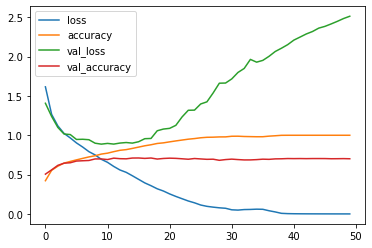

In [14]:
pd.DataFrame(history_base.history).plot()

# Advanced Model

In [15]:
input_adv = layers.Input((32, 32, 3))

In [16]:
layer_adv = layers.Conv2D(32, 4, activation="relu")(input_adv)
layer_adv = layers.Conv2D(32, 4, activation="relu")(input_adv)
layer_adv = layers.MaxPool2D(2)(layer_adv)
layer_adv = layers.Conv2D(64, 3, padding="same", activation="relu")(layer_adv)
layer_adv = layers.Conv2D(64, 3, padding="same", activation="relu")(layer_adv)
layer_adv = layers.MaxPool2D(2)(layer_adv)
layer_adv = layers.Conv2D(128, 3, padding="same", dilation_rate=2, activation="relu")(layer_adv)
layer_adv  = layers.GlobalAveragePooling2D()(layer_adv)

In [17]:
output_adv = layers.Dense(10, activation="softmax")(layer_adv)

In [18]:
model_adv = models.Model(input_adv, output_adv)
model_adv.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 128)         7385

In [19]:
model_adv.compile(
    loss=losses.CategoricalCrossentropy(),
    optimizer=optimizers.Adam(),
    metrics=["accuracy"],
)

In [20]:
history_dev = model_adv.fit(
    train_data_proc, train_label_proc,
    validation_data=(test_data_proc, test_label_proc),
    batch_size=256,
    epochs=50
)

Epoch 1/50
196/196 [==============================] - 39s 200ms/step - loss: 1.8343 - accuracy: 0.3126 - val_loss: 1.6229 - val_accuracy: 0.4035
Epoch 2/50
196/196 [==============================] - 2s 8ms/step - loss: 1.5472 - accuracy: 0.4260 - val_loss: 1.5174 - val_accuracy: 0.4375
Epoch 3/50
196/196 [==============================] - 2s 8ms/step - loss: 1.4258 - accuracy: 0.4794 - val_loss: 1.3482 - val_accuracy: 0.5150
Epoch 4/50
196/196 [==============================] - 2s 8ms/step - loss: 1.3434 - accuracy: 0.5177 - val_loss: 1.2907 - val_accuracy: 0.5370
Epoch 5/50
196/196 [==============================] - 2s 8ms/step - loss: 1.2716 - accuracy: 0.5453 - val_loss: 1.2220 - val_accuracy: 0.5697
Epoch 6/50
196/196 [==============================] - 2s 8ms/step - loss: 1.2132 - accuracy: 0.5673 - val_loss: 1.2078 - val_accuracy: 0.5751
Epoch 7/50
196/196 [==============================] - 2s 8ms/step - loss: 1.1525 - accuracy: 0.5953 - val_loss: 1.1253 - val_accuracy: 0.5998
Epo

<AxesSubplot:>

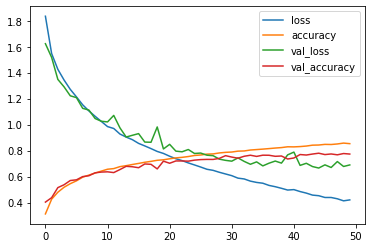

In [21]:
pd.DataFrame(history_dev.history).plot()

# Drop-Out Model

In [22]:
input_dout = layers.Input((32, 32, 3))

In [23]:
layer_dout = layers.Conv2D(32, 4, activation="relu")(input_dout)
layer_dout = layers.Conv2D(32, 4, activation="relu")(layer_dout)
layer_dout = layers.MaxPool2D(2)(layer_dout)
layer_dout = layers.Dropout(0.4)(layer_dout)
layer_dout = layers.Conv2D(64, 3, padding="same", activation="relu")(layer_dout)
layer_dout = layers.Conv2D(64, 3, padding="same", activation="relu")(layer_dout)
layer_dout = layers.MaxPool2D(2)(layer_dout)
layer_dout = layers.Dropout(0.4)(layer_dout)
layer_dout = layers.Conv2D(128, 3, padding="same", dilation_rate=2, activation="relu")(layer_dout)
layer_dout  = layers.GlobalAveragePooling2D()(layer_dout)

In [24]:
output_dout = layers.Dense(10, activation="softmax")(layer_dout)

In [25]:
model_dout = models.Model(input_dout, output_dout)
model_dout.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 26, 26, 32)        16416     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 64)        3692

In [26]:
model_dout.compile(
    loss=losses.CategoricalCrossentropy(),
    optimizer=optimizers.Adam(),
    metrics=["accuracy"],
)

In [27]:
history_dout = model_dout.fit(
    train_data_proc, train_label_proc,
    validation_data=(test_data_proc, test_label_proc),
    batch_size=256,
    epochs=50
)

Epoch 1/50
196/196 [==============================] - 50s 256ms/step - loss: 1.8975 - accuracy: 0.2829 - val_loss: 1.6352 - val_accuracy: 0.3866
Epoch 2/50
196/196 [==============================] - 2s 10ms/step - loss: 1.5615 - accuracy: 0.4149 - val_loss: 1.5150 - val_accuracy: 0.4401
Epoch 3/50
196/196 [==============================] - 2s 10ms/step - loss: 1.4245 - accuracy: 0.4782 - val_loss: 1.3539 - val_accuracy: 0.5034
Epoch 4/50
196/196 [==============================] - 2s 10ms/step - loss: 1.3193 - accuracy: 0.5210 - val_loss: 1.2097 - val_accuracy: 0.5668
Epoch 5/50
196/196 [==============================] - 2s 10ms/step - loss: 1.2297 - accuracy: 0.5607 - val_loss: 1.1399 - val_accuracy: 0.5970
Epoch 6/50
196/196 [==============================] - 2s 10ms/step - loss: 1.1764 - accuracy: 0.5815 - val_loss: 1.1140 - val_accuracy: 0.6058
Epoch 7/50
196/196 [==============================] - 2s 10ms/step - loss: 1.1213 - accuracy: 0.6036 - val_loss: 1.0802 - val_accuracy: 0.61

<AxesSubplot:>

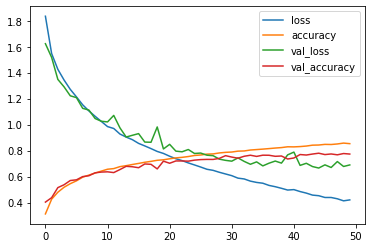

In [28]:
pd.DataFrame(history_dev.history).plot()

# Batch Normalization Model

In [29]:
input_nor = layers.Input((32, 32, 3))

In [30]:
layer_nor = layers.Conv2D(32, 4, activation="relu")(input_nor)
layer_nor = layers.BatchNormalization()(layer_nor)
layer_nor = layers.Conv2D(32, 4, activation="relu")(layer_nor)
layer_nor = layers.BatchNormalization()(layer_nor)
layer_nor = layers.MaxPool2D(2)(layer_nor)
layer_nor = layers.Dropout(0.4)(layer_nor)
layer_nor = layers.Conv2D(64, 3, padding="same", activation="relu")(layer_nor)
layer_nor = layers.BatchNormalization()(layer_nor)
layer_nor = layers.Conv2D(64, 3, padding="same", activation="relu")(layer_nor)
layer_nor = layers.BatchNormalization()(layer_nor)
layer_nor = layers.MaxPool2D(2)(layer_nor)
layer_nor = layers.Dropout(0.4)(layer_nor)
layer_nor = layers.Conv2D(128, 3, padding="same", dilation_rate=2, activation="relu")(layer_nor)
layer_nor = layers.BatchNormalization()(layer_nor)
layer_nor  = layers.GlobalAveragePooling2D()(layer_nor)

In [31]:
output_nor = layers.Dense(10, activation="softmax")(layer_nor)

In [32]:
model_nor = models.Model(input_nor, output_nor)
model_nor.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 29, 29, 32)        1568      
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 29, 32)        128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 26, 26, 32)        16416     
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 13, 13, 32)        0   

In [33]:
model_nor.compile(
    loss=losses.CategoricalCrossentropy(),
    optimizer=optimizers.Adam(),
    metrics=["accuracy"],
)

In [34]:
history_nor = model_nor.fit(
    train_data_proc, train_label_proc,
    validation_data=(test_data_proc, test_label_proc),
    batch_size=256,
    epochs=50
)

Epoch 1/50
196/196 [==============================] - 31s 157ms/step - loss: 1.3537 - accuracy: 0.5110 - val_loss: 4.0734 - val_accuracy: 0.1000
Epoch 2/50
196/196 [==============================] - 2s 11ms/step - loss: 1.0246 - accuracy: 0.6382 - val_loss: 3.3871 - val_accuracy: 0.1588
Epoch 3/50
196/196 [==============================] - 2s 11ms/step - loss: 0.8805 - accuracy: 0.6893 - val_loss: 1.1606 - val_accuracy: 0.5779
Epoch 4/50
196/196 [==============================] - 2s 11ms/step - loss: 0.7915 - accuracy: 0.7236 - val_loss: 0.9268 - val_accuracy: 0.6906
Epoch 5/50
196/196 [==============================] - 2s 11ms/step - loss: 0.7319 - accuracy: 0.7430 - val_loss: 0.8070 - val_accuracy: 0.7192
Epoch 6/50
196/196 [==============================] - 2s 11ms/step - loss: 0.6825 - accuracy: 0.7597 - val_loss: 0.7072 - val_accuracy: 0.7569
Epoch 7/50
196/196 [==============================] - 2s 11ms/step - loss: 0.6411 - accuracy: 0.7764 - val_loss: 0.6627 - val_accuracy: 0.77

<AxesSubplot:>

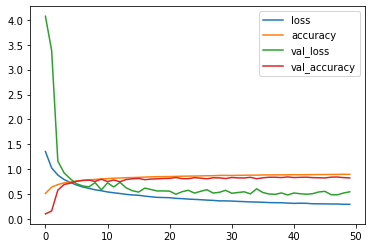

In [35]:
pd.DataFrame(history_nor.history).plot()

# Data Augmentation

In [36]:
input_aug = layers.Input((32, 32, 3))

In [37]:
layer_aug = layers.Conv2D(32, 4, activation="relu")(input_aug)
layer_aug = layers.BatchNormalization()(layer_aug)
layer_aug = layers.Conv2D(32, 4, activation="relu")(layer_aug)
layer_aug = layers.BatchNormalization()(layer_aug)
layer_aug = layers.MaxPool2D(2)(layer_aug)
layer_aug = layers.Dropout(0.4)(layer_aug)
layer_aug = layers.Conv2D(64, 3, padding="same", activation="relu")(layer_aug)
layer_aug = layers.BatchNormalization()(layer_aug)
layer_aug = layers.Conv2D(64, 3, padding="same", activation="relu")(layer_aug)
layer_aug = layers.BatchNormalization()(layer_aug)
layer_aug = layers.MaxPool2D(2)(layer_aug)
layer_aug = layers.Dropout(0.4)(layer_aug)
layer_aug = layers.Conv2D(128, 3, padding="same", dilation_rate=2, activation="relu")(layer_aug)
layer_aug = layers.BatchNormalization()(layer_aug)
layer_aug  = layers.GlobalAveragePooling2D()(layer_aug)

In [38]:
output_aug = layers.Dense(10, activation="softmax")(layer_aug)

In [39]:
model_aug = models.Model(input_aug, output_aug)

In [40]:
model_aug.compile(
    loss=losses.CategoricalCrossentropy(),
    optimizer=optimizers.Adam(),
    metrics=["accuracy"],
)

In [41]:
image_gen = preprocessing.image.ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    rotation_range=20,
    zoom_range=0.1
)
train_gen = image_gen.flow(train_data_proc, train_label_proc)

In [42]:
history_aug = model_aug.fit(
    train_gen,
    validation_data=(test_data_proc, test_label_proc),
    batch_size=256,
    epochs=50
)

Epoch 1/50
1563/1563 [==============================] - 37s 24ms/step - loss: 1.4297 - accuracy: 0.4837 - val_loss: 1.4891 - val_accuracy: 0.5041
Epoch 2/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.1363 - accuracy: 0.5960 - val_loss: 1.2138 - val_accuracy: 0.5974
Epoch 3/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.0104 - accuracy: 0.6419 - val_loss: 1.1659 - val_accuracy: 0.6246
Epoch 4/50
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9446 - accuracy: 0.6689 - val_loss: 1.0071 - val_accuracy: 0.6648
Epoch 5/50
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8961 - accuracy: 0.6856 - val_loss: 0.8364 - val_accuracy: 0.7195
Epoch 6/50
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8611 - accuracy: 0.6997 - val_loss: 0.7811 - val_accuracy: 0.7319
Epoch 7/50
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8338 - accuracy: 0.7100 - val_loss: 0.9061 -

<AxesSubplot:>

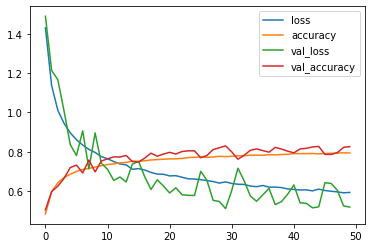

In [43]:
pd.DataFrame(history_aug.history).plot()

In [44]:
history_aug = model_aug.fit(
    train_gen,
    validation_data=(test_data_proc, test_label_proc),
    batch_size=256,
    epochs=150
)

Epoch 1/150
1563/1563 [==============================] - 20s 13ms/step - loss: 0.5908 - accuracy: 0.7936 - val_loss: 0.5196 - val_accuracy: 0.8241
Epoch 2/150
1563/1563 [==============================] - 20s 13ms/step - loss: 0.5852 - accuracy: 0.7970 - val_loss: 0.5355 - val_accuracy: 0.8206
Epoch 3/150
1563/1563 [==============================] - 20s 13ms/step - loss: 0.5891 - accuracy: 0.7952 - val_loss: 0.5407 - val_accuracy: 0.8199
Epoch 4/150
1563/1563 [==============================] - 20s 13ms/step - loss: 0.5858 - accuracy: 0.7956 - val_loss: 0.5306 - val_accuracy: 0.8257
Epoch 5/150
1563/1563 [==============================] - 20s 13ms/step - loss: 0.5801 - accuracy: 0.7980 - val_loss: 0.6057 - val_accuracy: 0.7994
Epoch 6/150
1563/1563 [==============================] - 20s 13ms/step - loss: 0.5857 - accuracy: 0.7965 - val_loss: 0.5375 - val_accuracy: 0.8212
Epoch 7/150
1563/1563 [==============================] - 20s 13ms/step - loss: 0.5768 - accuracy: 0.7981 - val_loss: 0

<AxesSubplot:>

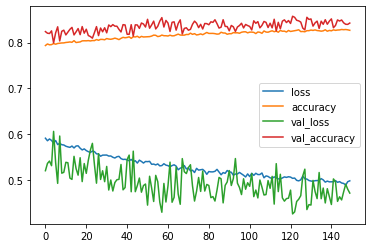

In [45]:
pd.DataFrame(history_aug.history).plot()